In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree
%matplotlib inline
import math as m
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [3]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [4]:
clf

DecisionTreeClassifier(criterion='entropy')

In [5]:
X = data[['X_1', 'X_2']]
y = data.Y

In [6]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'X_1 <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = Negative'),
 Text(0.25, 0.5, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Negative'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Negative'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Positive'),
 Text(0.75, 0.5, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = Positive'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Positive'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Negative')]

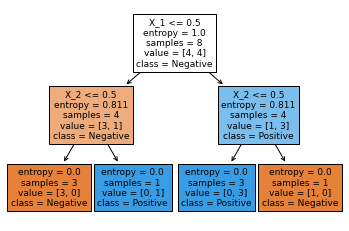

In [7]:
tree.plot_tree(clf, class_names=['Negative', 'Positive'] ,feature_names=list(X),filled=True)

In [8]:
E_sh_sob=(1/1)*m.log2((1/1)) - 0
E_sh_kot=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))
E_gav_sob=0 - (5/5)*m.log2((5/5))
E_gav_kot=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))
E_laz_sob=0 - (6/6)*m.log2((6/6))
E_laz_kot=-(4/10)*m.log2((4/10)) - (6/10)*m.log2((6/10))

In [9]:
E_laz_kot - (5/10)*E_gav_sob - (5/10)*E_gav_kot


0.6099865470109874

In [10]:
titanic_data = pd.read_csv('Downloads/train.csv')

In [11]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Survived', ], axis = 1)

In [14]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [15]:
y = titanic_data.Survived

In [16]:
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [18]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [19]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size =0.33, random_state=42)

In [22]:
clf.score(X,y)

0.9797979797979798

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
clf.score(X_test, y_test)

0.7796610169491526

In [25]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [27]:
clf.score(X_test, y_test)

0.823728813559322

In [28]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()

In [31]:

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score' : [train_score], 'test_score': [test_score],
                                   'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

C:\Users\bigre\AppData\Local\Temp\ipykernel_9068\1391584816.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\bigre\AppData\Local\Temp\ipykernel_9068\1391584816.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\bigre\AppData\Local\Temp\ipykernel_9068\1391584816.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\bigre\AppData\Local\Temp\ipykernel_9068\1391584816.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_scor

In [32]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350


In [33]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'],
                          var_name = 'set_type', value_name = 'score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

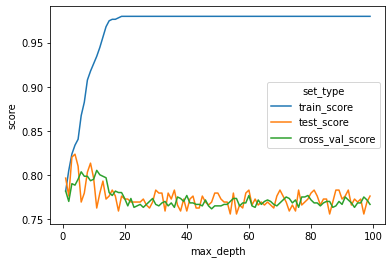

In [34]:
sns.lineplot(data=scores_data_long, x = 'max_depth', y = 'score', hue = 'set_type')

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [37]:
best_clf.fit(X_train, y_train)

best_clf.score(X_test, y_test)

0.8067796610169492

In [38]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
parametrs = {'criterion': ['gini', 'entropy'],'max_depth':range(1,30)}

In [1]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5)

NameError: name 'GridSearchCV' is not defined

In [40]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [41]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [42]:
best_clf = grid_search_cv_clf.best_estimator_

In [43]:
best_clf.score(X_test,y_test)
y_pred = best_clf.predict(X_test)

In [44]:
precision_score(y_test,y_pred)

0.8297872340425532

In [45]:
recall_score(y_test,y_pred)

0.65

In [46]:
y_pred_prob = best_clf.predict_proba(X_test)

<AxesSubplot:>

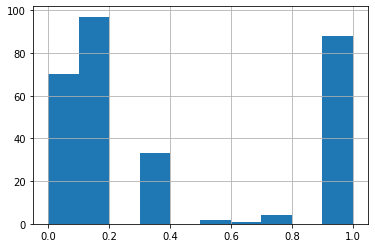

In [47]:
pd.Series(y_pred_prob[:,1]).hist()

In [48]:
y_pred = np.where(y_pred_prob[:,1] > 0.8,1,0)

In [49]:
precision_score(y_test,y_pred)

0.8409090909090909

In [50]:
recall_score(y_test,y_pred)

0.6166666666666667

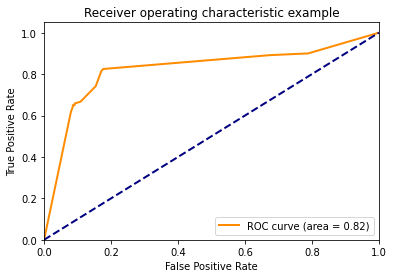

In [51]:
from sklearn.metrics import roc_curve, auc
lw = 2
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [61]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_split=100, min_samples_leaf=10)

In [62]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

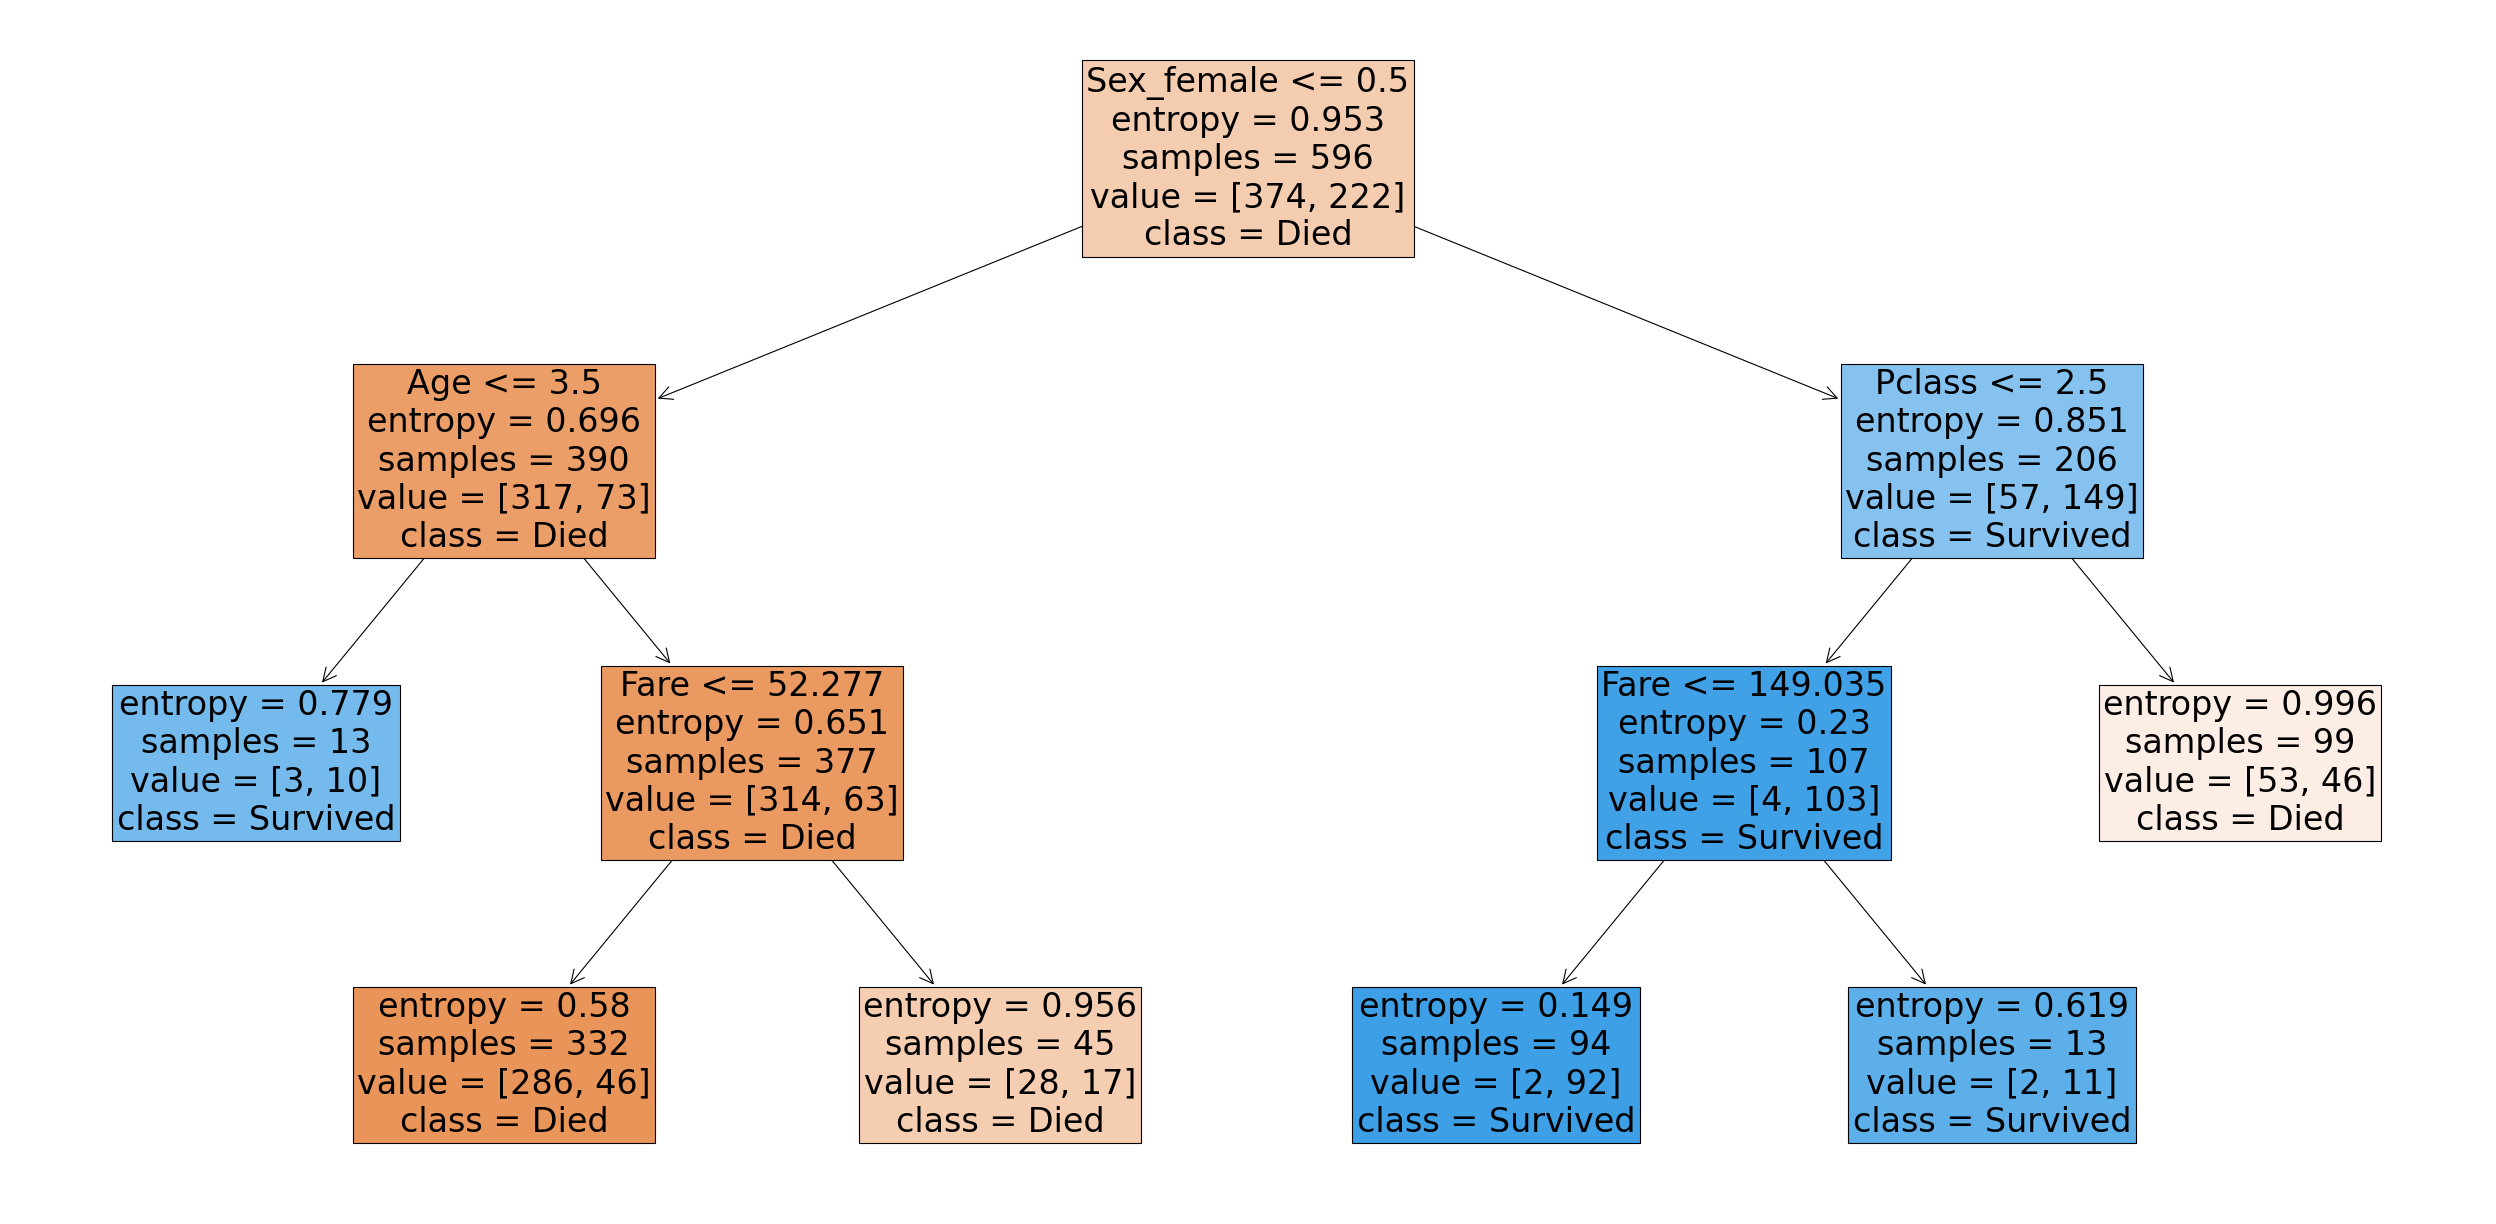

In [63]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, class_names=['Died','Survived'],fontsize=30,filled=True,feature_names=list(X))